In [2]:
import numpy as np
import jax
import jax.numpy as jnp
import time
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(0)
key = jax.random.PRNGKey(0)

# Lists to store timings
time_numpy = []
time_jax = []
time_jax_jit = []  # To track JIT-compiled JAX performance

# Matrix sizes to test (from 2x2 to 400x400)
sizes = range(2, 1500,50)


# Matrix Multiplication

In [ ]:

for i in sizes:
    # --- NumPy ---
    t0 = time.time()
    a_np = np.random.normal(size=(i, i))
    b_np = np.random.normal(size=(i, i))
    np_result = a_np @ b_np
    t1 = time.time()
    time_numpy.append(t1 - t0)

    # --- JAX (no JIT) ---
    t2 = time.time()
    a_jax = jax.random.normal(key, (i, i))
    b_jax = jax.random.normal(key, (i, i))
    jax_result = (a_jax @ b_jax).block_until_ready()  # Ensure computation finishes
    t3 = time.time()
    time_jax.append(t3 - t2)

    # --- JAX (with JIT) ---
    # Compile once outside the loop (just-in-time)
    if i == sizes[0]:  # Compile on first run
        jitted_matmul = jax.jit(lambda x, y: x @ y)
    t4 = time.time()
    jax_jit_result = jitted_matmul(a_jax, b_jax).block_until_ready()
    t5 = time.time()
    time_jax_jit.append(t5 - t4)



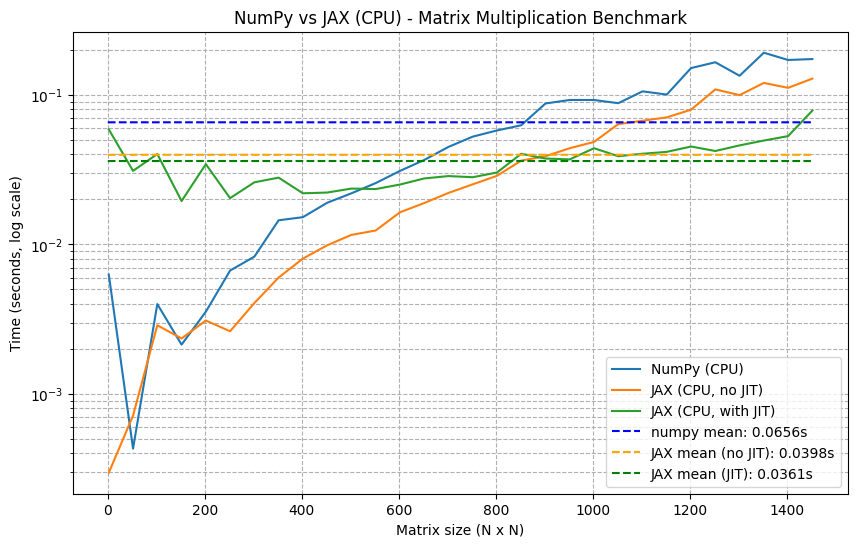

In [53]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sizes, time_numpy, label="NumPy (CPU)")
plt.plot(sizes, time_jax, label="JAX (CPU, no JIT)")
plt.plot(sizes, time_jax_jit, label="JAX (CPU, with JIT)")

# Plot mean lines
plt.plot(np.mean(time_numpy)*np.ones(list(sizes)[-1]-list(sizes)[0]),"--",color="blue", label=f"numpy mean: {np.mean(time_numpy):.4f}s")
plt.plot(np.mean(time_jax)*np.ones(list(sizes)[-1]-list(sizes)[0]),"--",color="orange", label=f"JAX mean (no JIT): {np.mean(time_jax):.4f}s")
plt.plot(np.mean(time_jax_jit)*np.ones(list(sizes)[-1]-list(sizes)[0]),"--",color="green", label=f"JAX mean (JIT): {np.mean(time_jax_jit):.4f}s")

plt.xlabel("Matrix size (N x N)")
plt.ylabel("Time (seconds, log scale)")
plt.yscale("log")
plt.title("NumPy vs JAX (CPU) - Matrix Multiplication Benchmark")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()

# Matrix inversion

In [60]:
import numpy as np
import jax
import jax.numpy as jnp
import time
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(0)
key = jax.random.PRNGKey(0)

# Lists to store timings
time_numpy = []
time_jax = []
time_jax_jit = []  # To track JIT-compiled JAX performance

# Matrix sizes to test (from 2x2 to 200x200)
# Smaller max size than matmul because inversion is O(N^3)
sizes = range(2, 1500,50)

for i in sizes:
    # Generate a random matrix (avoid singular matrices)
    a_np = np.random.normal(size=(i, i)) + 5 * np.eye(i)  # Ensure well-conditioned
    a_jax = jnp.array(a_np)  # Share the same matrix for fairness

    # --- NumPy ---
    t0 = time.time()
    np_inv = np.linalg.inv(a_np)
    t1 = time.time()
    time_numpy.append(t1 - t0)

    # --- JAX (no JIT) ---
    t2 = time.time()
    jax_inv = jnp.linalg.inv(a_jax).block_until_ready()  # Force sync
    t3 = time.time()
    time_jax.append(t3 - t2)

    # --- JAX (with JIT) ---
    # Compile once outside the loop (JIT the first time)
    if i == sizes[0]:
        jitted_inv = jax.jit(jnp.linalg.inv)
    t4 = time.time()
    jax_jit_inv = jitted_inv(a_jax).block_until_ready()
    t5 = time.time()
    time_jax_jit.append(t5 - t4)


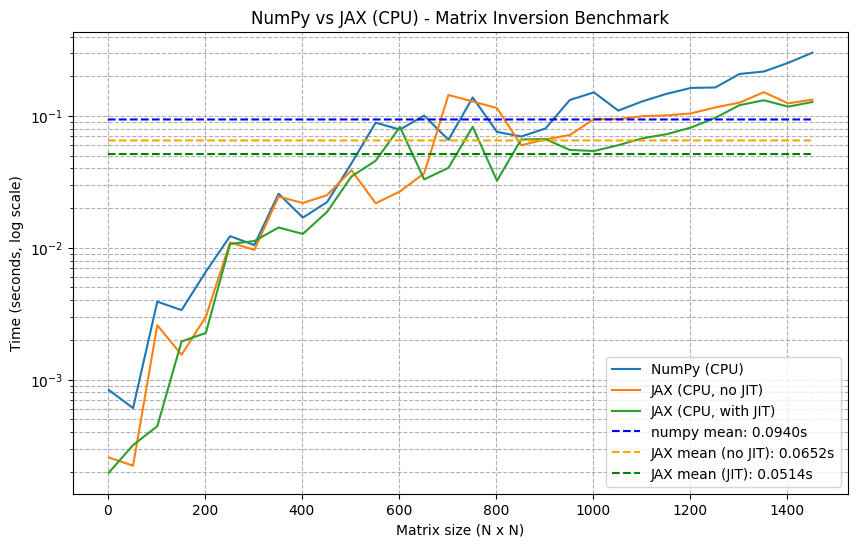

In [61]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sizes, time_numpy, label="NumPy (CPU)")
plt.plot(sizes, time_jax, label="JAX (CPU, no JIT)")
plt.plot(sizes, time_jax_jit, label="JAX (CPU, with JIT)")

# Plot mean lines
plt.plot(np.mean(time_numpy)*np.ones(list(sizes)[-1]-list(sizes)[0]),"--",color="blue", label=f"numpy mean: {np.mean(time_numpy):.4f}s")
plt.plot(np.mean(time_jax)*np.ones(list(sizes)[-1]-list(sizes)[0]),"--",color="orange", label=f"JAX mean (no JIT): {np.mean(time_jax):.4f}s")
plt.plot(np.mean(time_jax_jit)*np.ones(list(sizes)[-1]-list(sizes)[0]),"--",color="green", label=f"JAX mean (JIT): {np.mean(time_jax_jit):.4f}s")

plt.xlabel("Matrix size (N x N)")
plt.ylabel("Time (seconds, log scale)")
plt.yscale("log")
plt.title("NumPy vs JAX (CPU) - Matrix Inversion Benchmark")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()

# matrix solve

In [8]:
import numpy as np
import jax
import jax.numpy as jnp
import time
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(0)
key = jax.random.PRNGKey(0)

# Lists to store timings
time_numpy = []
time_jax = []
time_jax_jit = []  # For JIT-compiled JAX

# Matrix sizes to test (smaller than matmul/inv due to O(N^3) complexity)
sizes = range(2, 1500,50)  # Reduced max size for solve()

for i in sizes:
    # Generate a random well-conditioned matrix (A) and vector (b)
    A_np = np.random.normal(size=(i, i)) + 10 * np.eye(i)  # Ensure non-singular
    b_np = np.random.normal(size=(i, 1))
    A_jax = jnp.array(A_np)  # Shared input for fairness
    b_jax = jnp.array(b_np)

    # --- NumPy ---
    t0 = time.time()
    x_np = np.linalg.solve(A_np, b_np)
    t1 = time.time()
    time_numpy.append(t1 - t0)

    # --- JAX (no JIT) ---
    t2 = time.time()
    x_jax = jnp.linalg.solve(A_jax, b_jax).block_until_ready()  # Force sync
    t3 = time.time()
    time_jax.append(t3 - t2)

    # --- JAX (with JIT) ---
    # Compile once (outside loop) for fairness
    if i == sizes[0]:
        jitted_solve = jax.jit(jnp.linalg.solve)
    t4 = time.time()
    x_jax_jit = jitted_solve(A_jax, b_jax).block_until_ready()
    t5 = time.time()
    time_jax_jit.append(t5 - t4)


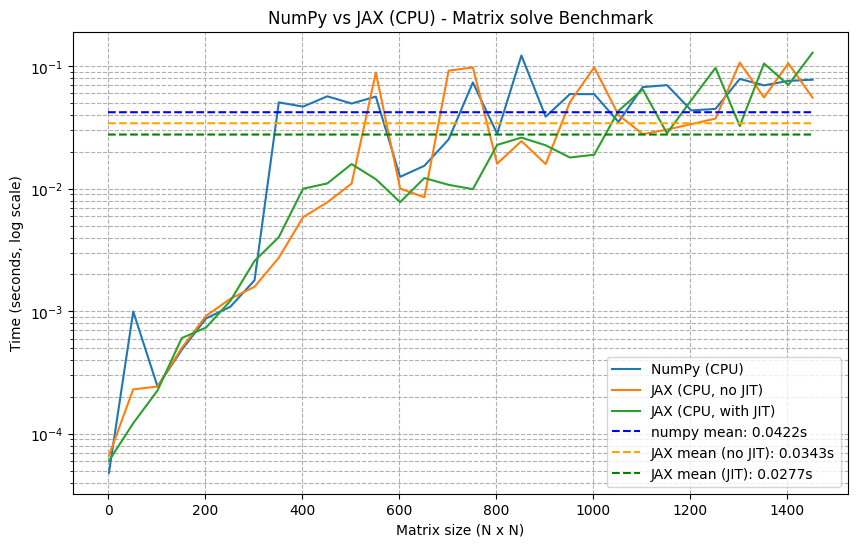

In [9]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sizes, time_numpy, label="NumPy (CPU)")
plt.plot(sizes, time_jax, label="JAX (CPU, no JIT)")
plt.plot(sizes, time_jax_jit, label="JAX (CPU, with JIT)")

# Plot mean lines
plt.plot(np.mean(time_numpy)*np.ones(list(sizes)[-1]-list(sizes)[0]),"--",color="blue", label=f"numpy mean: {np.mean(time_numpy):.4f}s")
plt.plot(np.mean(time_jax)*np.ones(list(sizes)[-1]-list(sizes)[0]),"--",color="orange", label=f"JAX mean (no JIT): {np.mean(time_jax):.4f}s")
plt.plot(np.mean(time_jax_jit)*np.ones(list(sizes)[-1]-list(sizes)[0]),"--",color="green", label=f"JAX mean (JIT): {np.mean(time_jax_jit):.4f}s")

plt.xlabel("Matrix size (N x N)")
plt.ylabel("Time (seconds, log scale)")
plt.yscale("log")
plt.title("NumPy vs JAX (CPU) - Matrix solve Benchmark")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()